# WEB SCRAPING PROJECT ON WORLD POPULATION

## DataSet Overview

The provided dataset appears to be a collection of demographic data for various countries. It includes information on:
+ Country: The name of the country.
+ Population 2024: The estimated population of the country in the year 2024.
+ Yearly Change: The annual percentage change in population.
+ Net Change: The absolute change in population (positive or negative) during the year.
+ Density: The population density per square kilometer.
+ Land Area: The total land area of the country in square kilometers.
+ Migrant (net): The net migration (immigration minus emigration) for the country.
+ Fertility Rate: The average number of children born per woman.
+ Median Age: The median age of the population.
+ Urban Population: The percentage of the population living in urban areas.
+ World Share: The country's percentage of the global population.

## Key Insights

Based on the data, we can observe several trends and patterns:

+ Population Growth: Countries like India, Pakistan, and Nigeria are experiencing significant population growth, while countries like China, Japan, and + Russia are experiencing population decline or stagnation.
+ Population Density: Countries like Bangladesh, India, and the Philippines have high population densities, while countries like Russia, Canada, and + + Australia have low population densities.
+ Urbanization: Many countries are undergoing rapid urbanization, with a growing percentage of their populations living in cities.
+ Fertility Rates: Countries with higher fertility rates tend to have younger populations, while countries with lower fertility rates tend to have older populations.
+ Migration: Net migration can have a significant impact on population growth or decline, as seen in countries like the United States and Canada.

**Importing library**

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

## Web Scraping

In [ ]:
url='https://www.worldometers.info/world-population/population-by-country/'
response=requests.get(url)
soup=BeautifulSoup(response.text,'html.parser')

In [ ]:
rows=soup.find('table',{'id':'example2'}).find('tbody').find_all('tr')

In [ ]:
countries_list=[]
for row in rows:
    dic={}
    dic['Country']=row.find_all('td')[1].text
    dic['Population 2024']=row.find_all('td')[2].text
    dic['Yearly Change']=row.find_all('td')[3].text
    dic['Net Change']=row.find_all('td')[4].text
    dic['Density']=row.find_all('td')[5].text
    dic['Land Area']=row.find_all('td')[6].text
    dic['Migrant (net)']=row.find_all('td')[7].text
    dic['Fertility Rate']=row.find_all('td')[8].text
    dic['Median Age']=row.find_all('td')[9].text
    dic['Urban Population']=row.find_all('td')[10].text
    dic['World Share']=row.find_all('td')[11].text
    countries_list.append(dic)

In [ ]:
df=pd.DataFrame(countries_list)
df.to_csv('countries_data.csv',index=False)

In [11]:
df=pd.read_csv(r'C:\Users\pc\OneDrive\Documents\countries_data - Copy.csv')

In [12]:
df.head()

,Country,Population 2024,Yearly Change,Net Change,Density,Land Area,Migrant (net),Fertility Rate,Median Age,Urban Population,World Share
0,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %


## **Data Cleaning**

In [14]:
df.isnull().sum()

Country             0
Population 2024     0
Yearly Change       0
Net Change          0
Density             0
Land Area           0
Migrant (net)       0
Fertility Rate      0
Median Age          0
Urban Population    0
World Share         0
dtype: int64

In [15]:
df.dtypes

Country              object
Population 2024      object
Yearly Change        object
Net Change           object
Density              object
Land Area            object
Migrant (net)        object
Fertility Rate      float64
Median Age            int64
Urban Population     object
World Share          object
dtype: object

In [ ]:
# First, replace commas with empty strings to clean up the data
df['Population 2024'] = df['Population 2024'].str.replace(',', '')
# Now, convert the column to int
df['Population 2024'] = df['Population 2024'].astype(int)

In [52]:
# Remove commas and convert the 'Density' column to integers
df['Density'] = df['Density'].str.replace(',', '').astype(int)

In [21]:
df.dtypes

Country              object
Population 2024       int64
Yearly Change        object
Net Change           object
Density              object
Land Area            object
Migrant (net)        object
Fertility Rate      float64
Median Age            int64
Urban Population     object
World Share          object
dtype: object

## **Descriptive Statistics**

In [22]:
df.describe()

,Population 2024,Fertility Rate,Median Age
count,2.340000e+02,234.000000,234.000000
mean,3.487407e+07,2.332051,31.679487
std,1.383471e+08,1.163002,9.810427
min,4.960000e+02,0.700000,14.000000
25%,4.782600e+05,1.500000,23.000000
50%,5.615064e+06,2.000000,32.500000
75%,2.346508e+07,2.975000,40.000000
max,1.450936e+09,6.000000,59.000000


## **Visualization**

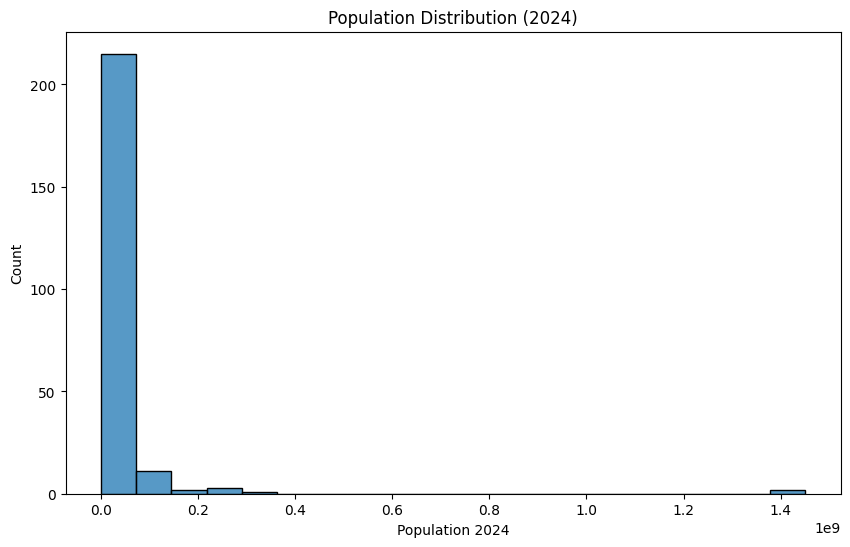

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['Population 2024'], bins=20)
plt.title('Population Distribution (2024)')
plt.show()

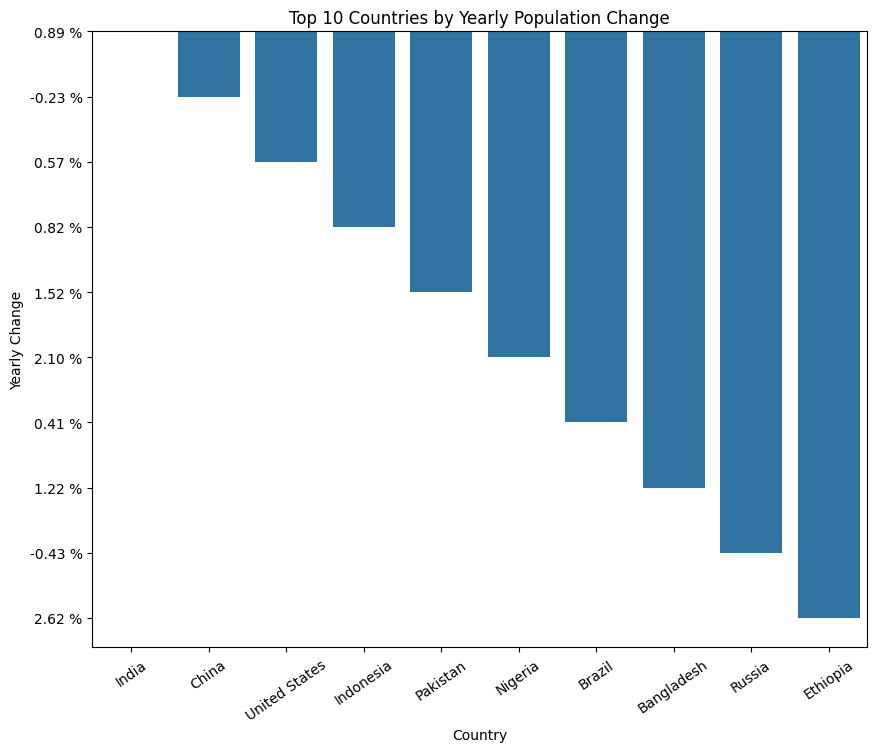

In [34]:
top_10 = df.nlargest(10, 'Population 2024')
plt.figure(figsize=(10,8))
sns.barplot(x='Country', y='Yearly Change', data=top_10)
plt.title('Top 10 Countries by Yearly Population Change')
plt.xticks(rotation=35)
plt.show()

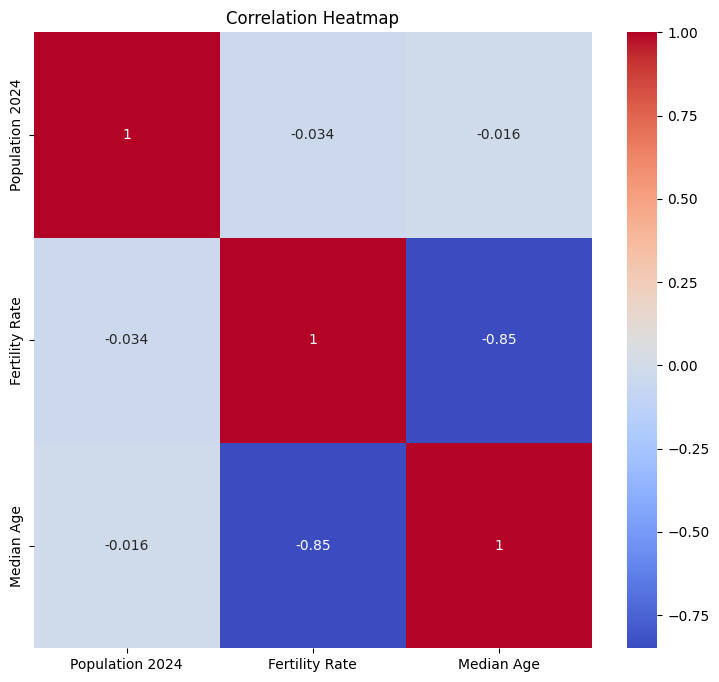

In [37]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Create the heatmap
plt.figure(figsize=(9,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


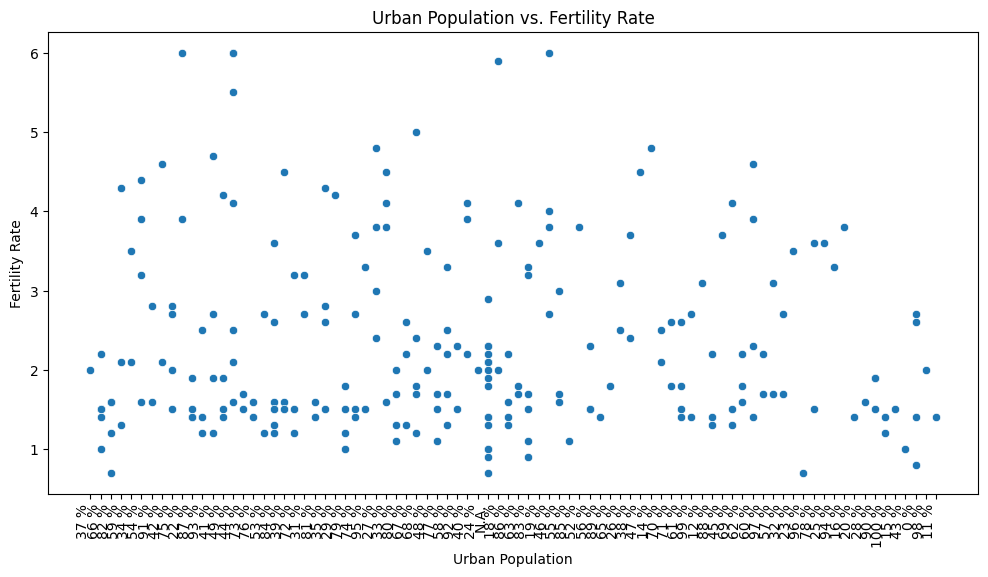

In [46]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Urban Population', y='Fertility Rate', data=df)
plt.title('Urban Population vs. Fertility Rate')
plt.xticks(rotation=90, ha='right')
plt.show()

In [47]:
df.nlargest(5, 'Population 2024')

,Country,Population 2024,Yearly Change,Net Change,Density,Land Area,Migrant (net),Fertility Rate,Median Age,Urban Population,World Share
0,India,1450935791,0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,China,1419321278,-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,United States,345426571,0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,Indonesia,283487931,0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,Pakistan,251269164,1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %


In [53]:
highest_density = df.nlargest(5, 'Density')
lowest_density = df.nsmallest(5, 'Density')

In [54]:
highest_density

,Country,Population 2024,Yearly Change,Net Change,Density,Land Area,Migrant (net),Fertility Rate,Median Age,Urban Population,World Share
215,Monaco,38631,-0.83 %,-325,25927,1,110,2.1,54,N.A.,0.00 %
166,Macao,720262,0.89 %,"6,350",24009,30,"1,620",0.7,39,96 %,0.01 %
114,Singapore,5832387,0.75 %,"43,297",8332,700,"20,011",1.0,36,N.A.,0.07 %
104,Hong Kong,7414909,-0.37 %,"-27,825",7062,"1,050","-19,272",0.7,47,N.A.,0.09 %
214,Gibraltar,39329,2.23 %,858,3933,10,598,1.9,39,90 %,0.00 %


In [55]:
lowest_density

,Country,Population 2024,Yearly Change,Net Change,Density,Land Area,Migrant (net),Fertility Rate,Median Age,Urban Population,World Share
205,Greenland,55840,-0.15 %,-82,0,"410,450",-284,1.9,35,90 %,0.00 %
230,Falkland Islands,3470,-0.20 %,-7,0,"12,170",-13,1.7,42,68 %,0.00 %
132,Mongolia,3475540,1.27 %,"43,608",2,"1,553,560",83,2.6,27,67 %,0.04 %
170,Western Sahara,590506,1.86 %,"10,777",2,"266,000","5,358",2.2,32,97 %,0.01 %
54,Australia,26713205,0.99 %,"262,081",3,"7,682,300","138,510",1.6,38,86 %,0.33 %


## Insights

**After the visualizations and descriptive analysis, you can derive insights such as:**
+ **Which countries have the highest population growth?**
+ **How does fertility rate relate to the median age of the population?**
+ **What are the migration trends for the top 5 most populated countries?**

**This analysis will give you a good starting point for understanding the global population trends in 2024.**